In [1]:
from sklearn import datasets
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()

# Visualisation des données

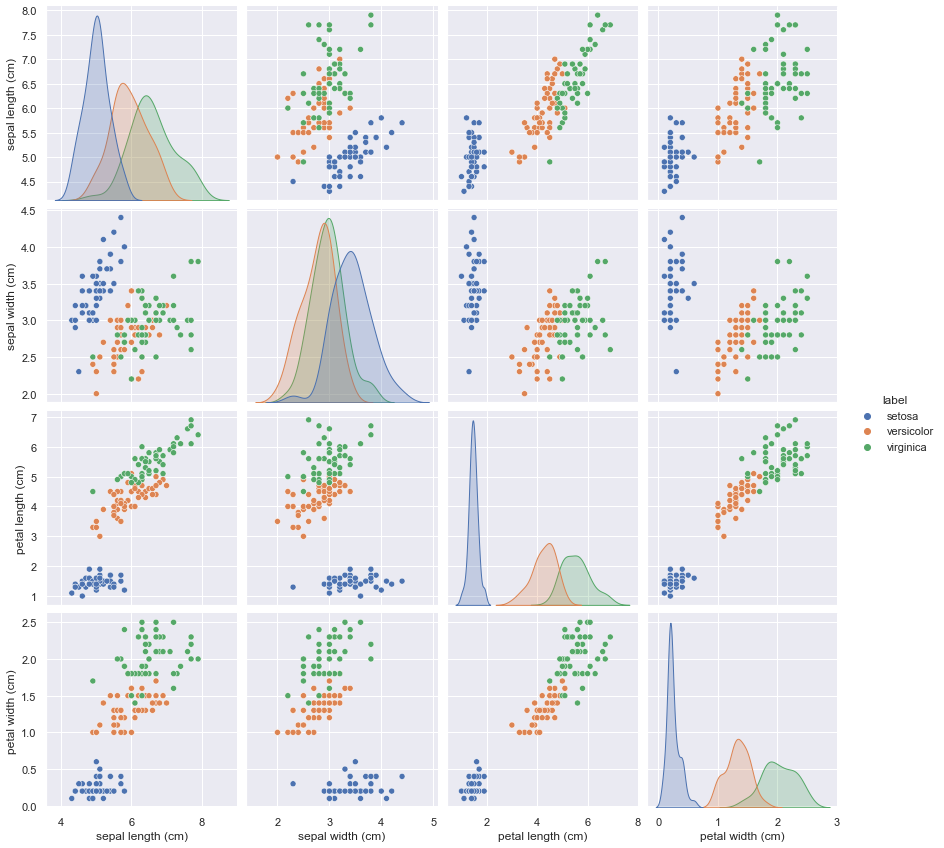

In [3]:
sns.set()
df = pd.DataFrame(iris.data, columns=iris['feature_names'] )
df['target'] = iris.target
df['label'] = df.apply(lambda x: iris['target_names'][int(x.target)], axis=1)
df.head()

sns.pairplot(df, hue='label', vars=iris['feature_names'], height=3);

# Classification des données

## K plus proches voisins

In [4]:
from sklearn import neighbors

# Création du classifieur
clf = neighbors.KNeighborsClassifier()

In [5]:
# Stockage des données
data = iris.data
target = iris.target

In [6]:
# Apprentissage
clf.fit(data, target)

KNeighborsClassifier()

In [7]:
# Vérification de la qualité de la prédiction
# Prédiction en utilisant les données de l'apprentissage
result = clf.predict(data)
print(result)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [8]:
# Première approche : on compte le nombre de mauvais résultats
res = result - target
taux = sum([abs(x) for x in res])/len(res)
print('Taux de réussite', 100*(1-taux), "%")

Taux de réussite 96.66666666666667 %


## Métriques

In [9]:
import sklearn.metrics as skm

#Scoring
print(skm.accuracy_score(result, target))
print(skm.accuracy_score(target,result))

0.9666666666666667
0.9666666666666667


### Matrice de confusion


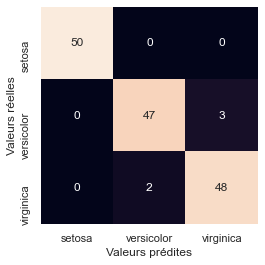

In [10]:
mat_conf = skm.confusion_matrix(target, result) 
sns.heatmap(mat_conf, square=True, annot=True, cbar=False
            , xticklabels=list(iris.target_names)
            , yticklabels=list(iris.target_names))
plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles');

##  Classification Naive Bayes

In [11]:
from sklearn.naive_bayes import GaussianNB
# Classifieur
clf = GaussianNB()
# Apprentissage 
clf.fit(iris.data, iris.target) # On aurait aussi pu utiliser le dataframe df
result = clf.predict(iris.data)

In [12]:
errors = sum(result != iris.target) # 6 erreurs sur 150 mesures
print("Nb erreurs:", errors)
print( "Pourcentage de prédiction juste:", (150-errors)*100/150)   

Nb erreurs: 6
Pourcentage de prédiction juste: 96.0


In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(result, iris.target) 

0.96

In [14]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(iris.target, result)

Text(89.18, 0.5, 'Valeurs réelles')

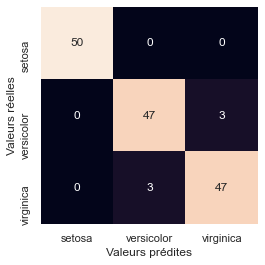

In [15]:
sns.heatmap(conf, square=True, annot=True, cbar=False,
             xticklabels=list(iris.target_names),
             yticklabels=list(iris.target_names))
plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles')

## Cartographie de l'apprentissage
On va générer des couples largeur x longeur de sépales, et visualiser le résultat. 

In [16]:
# On ne conserve que les longueurs/largeurs des sépales
data = iris.data[:, :2]
target = iris.target

#On réapprend
clf = GaussianNB()
clf.fit(data, target)
h = .15

# Nous recherchons les valeurs min/max de longueurs/largeurs des sépales
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1

x = np.arange(x_min, x_max, h)
y = np.arange(y_min, y_max, h)

In [17]:
#La fonction meshgrid permet d'obtenir une grille de coordonnées
# pour les valeurs des points comprises entre x_min, x_max et y_min, y_max
xx, yy = np.meshgrid(x,y)

# http://docs.scipy.org/doc/numpy/reference/generated/numpy.ravel.html
# applatit les données du tableau
data_samples = list(zip(xx.ravel(), yy.ravel()) )

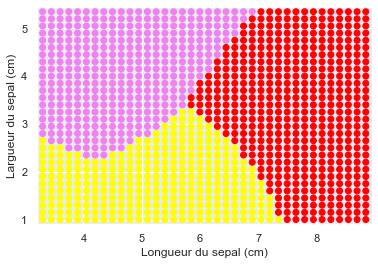

In [18]:
Z = clf.predict(data_samples)
#Z = Z.reshape(xx.shape)
plt.figure(1)
#plt.pcolormesh(xx, yy, Z) # Affiche les déductions en couleurs pour les couples x,y

# Plot also the training points
#plt.scatter(data[:, 0], data[:, 1], c=target)
colors = ['violet', 'yellow', 'red']
C = [colors[x] for x in Z]

plt.scatter(xx.ravel(), yy.ravel(), c=C)
plt.xlim(xx.min() - .1, xx.max() + .1)
plt.ylim(yy.min() - .1, yy.max() + .1)
plt.xlabel('Longueur du sepal (cm)')
plt.ylabel('Largueur du sepal (cm)');

<ipython-input-19-faf39075eec9>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z.reshape(xx.shape)) # Affiche les déductions en couleurs pour les couples x,y


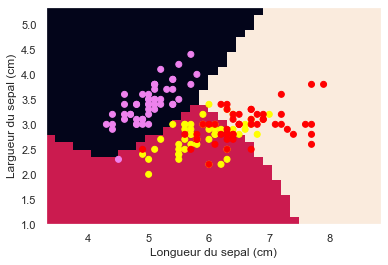

In [19]:
plt.figure(1)
plt.pcolormesh(xx, yy, Z.reshape(xx.shape)) # Affiche les déductions en couleurs pour les couples x,y
# Plot also the training points
colors = ['violet', 'yellow', 'red']
C = [colors[x] for x in target]
plt.scatter(data[:, 0], data[:, 1], c=C)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Longueur du sepal (cm)')
plt.ylabel('Largueur du sepal (cm)');

# Apprentissage par réseau de neurones
## Séparation des données
Répartitition des données entre données d'entrainement et données de tests.


In [20]:
from sklearn.model_selection import train_test_split 

data = iris.data
targer = iris.target


data_test = train_test_split(data, target)
data_train, data_test, target_train, target_test = data_test
print(len(data_train),len(data_test))
 
# Séparation des données 75% Apprentissage, 25% test
data_test = train_test_split(data, target,
                             random_state=0,
                             train_size=0.8)

data_train, data_test, target_train, target_test = data_test
print(len(data_train),len(data_test))

112 38
120 30


## Normalisation des données

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data_train)
data_train_norme = scaler.transform(data_train)
data_test_norme = scaler.transform(data_test)    


In [22]:
print(max(data_test_norme[0]))
print(data_test[0])

1.513156802118518
[5.8 2.8 5.1 2.4]


### Configuration du réseau et apprentissage

In [23]:
from sklearn.neural_network import MLPClassifier
# 2 couches cachées avec 10 neurones par couches
mlp = MLPClassifier(hidden_layer_sizes = (30,30,30),max_iter=500, tol=0.001)
mlp.fit(data_train_norme,target_train)

MLPClassifier(hidden_layer_sizes=(30, 30, 30), max_iter=500, tol=0.001)

### Vérification sur le jeu de test


In [24]:
predictions = mlp.predict(data_test_norme)

In [25]:
print(skm.accuracy_score(target_test,predictions))
print(skm.classification_report(target_test,predictions))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

